# HW 2: Nonlinear Optimization
---
## OR/ISE 501 - Fall 2021
__Assigned:__ Thu, 2 Sep (Groups of 2)  
__Due:__ 11:59p, Thu, 9 Sep  

__Group Members:__ Kamlesh Pandey And Ronak Dhongde

Please use the Code cells in this Jupyter notebook to answer each of the following questions. Please run all of the cells in your notebook and then submit it via Moodle. (There is a _Run All Cells_ command under the _Run_ menu.)

---
__(1)__ Two different medical technologies are being considered. The first requires more labor input but would require only \\$20 million per year to finance the equipment used; the annual cost to produce $x$ grams of output has been estimated to be $20 + 12x^{2/3}$. The second technology is more automated but requires \\$50 million per year to finance; its annual cost has been estimated to be $50 + 8x^{1/2}$. Determine the grams per year at which both technologies would have the same cost.

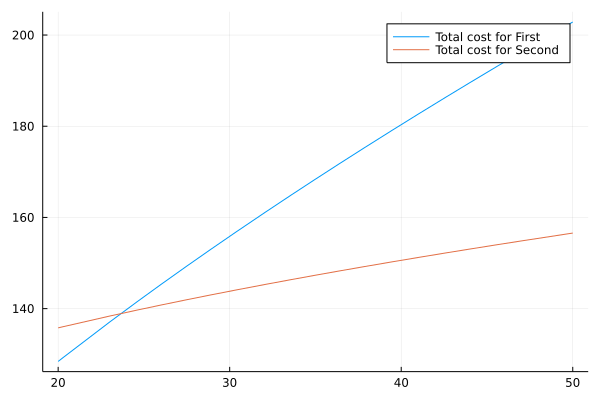

In [1]:
tc1(x) = 40 + 12*x^(2/3)
tc2(x) = 100 + 8*x^(1/2) 

using Plots
plot(tc1,20,50, label="Total cost for First")
plot!(tc2,20,50, label="Total cost for Second")

In [2]:
using Optim
x = optimize(x-> abs(tc1(x) - tc2(x)), 20,30)
x° = x.minimizer

@show x°

x° = 23.66734386023591


23.66734386023591

In [3]:
println("The gram per year at which both technology has same cost = ", x°, " grams")

The gram per year at which both tech has same cost = 23.66734386023591 grams


---
__(2)__ Forty potential sites for tracking devices have been identified throughout a wildlife preserve. Dedicated fiber-optic cables will be installed in a straight line from each tracking device to a station that can receive input from up to five devices.

__(2*a*)__ Determine the location for the station, and at which sites tracking devices should be installed so that the total length of cable is minimized. The coordinates of the potential sites can be generated by running the following code:

```
using Random
Random.seed!(93645)
P = 1000*rand(40,2)
```

In [3]:
using Random
Random.seed!(93645)
P = 1000*rand(40,2)


40×2 Matrix{Float64}:
 642.56    337.342
 879.614   218.389
 784.373   788.863
 550.661   771.023
 800.824   721.576
 571.686    71.1399
 253.732   355.388
 802.784   883.605
 492.999   361.518
 300.166   740.463
 874.868   398.633
 574.041   416.547
 726.841   555.535
   ⋮       
 269.52    469.638
 249.021   279.961
 794.609   280.53
 243.525   421.832
 219.624   168.503
 143.819   236.034
 601.927   240.286
 229.874    19.8552
 931.981   632.216
 438.503   197.553
 935.394   138.736
  61.6267  956.177

In [4]:
using Statistics, Optim, Plots
x0 = mean(P, dims=1)[:]


2-element Vector{Float64}:
 509.8938025236736
 453.2336897102292

In [5]:
dist2(x,P) = sqrt.(sum((x' .- P).^2, dims = 2))
x° = optimize(x->sum(dist2(x,P)), x0).minimizer

# xrng = -10:.1:950
# yrng = -10:.1:950

# contour(xrng, yrng, (x1,x2) -> sum(dist2([x1,x2], P)))
# scatter!(P[:,1], P[:,2], label="Potential Sites")
# scatter!([x°[1]], [x°[2]], label="Station Location")

2-element Vector{Float64}:
 500.7701036495029
 423.45893823601716

In [6]:
function dist2min5pts(x,p)
    d = dist2(x,P)
    idx = sortperm(d[:])
    return d[idx[1:5]]
end
    

dist2min5pts (generic function with 1 method)

In [6]:
TD° = Inf
i° , x° = NaN, NaN
for i = 1:size(P,1) 
    x = optimize(x->sum(dist2min5pts(x,P)), P[i,:]).minimizer
    TD = sum(dist2min5pts(x,P))
    println(i,": ",TD)
    if TD < TD°
        iᵒ,xᵒ,TDᵒ = i,x,TD
    end
end

1: 304.6737355998062
2: 304.67373561910495
3: 519.2010808427099
4: 436.9217282371945
5: 505.66149282269976
6: 524.5503458524474
7: 304.67373559980854
8: 436.921728218501
9: 304.67373560455854
10: 304.67373560075384
11: 436.9217282204253
12: 304.67373559998924
13: 436.92172822153066
14: 516.7002181473023
15: 518.9226884071944
16: 304.6737356010998
17: 304.6737356007689
18: 304.6737356000364
19: 436.9217282325419
20: 516.7002181488268
21: 436.9217282199395
22: 812.7603857385711
23: 304.6737356008157
24: 548.6396970624725
25: 444.98892750262024
26: 304.67373560230067
27: 473.26841343838146
28: 304.6737356130869
29: 304.6737356011891
30: 304.67373560580154
31: 304.6737356001802
32: 304.67373560210586
33: 304.67373559962635
34: 304.6737356056362
35: 304.67373559988135
36: 516.7002181487412
37: 436.921728219114
38: 436.9217282183116
39: 304.6737356002322
40: 812.7603857375653


In [7]:
idx = sortperm(dist2(x°, P)[:])[1:5]

5-element Vector{Int64}:
 16
  9
 12
 18
  1

__(2*b*)__ Describe (in words, no code) a possible procedure to install tracking devices at each site if seven additional identical receiving stations were to become available.

_Your Procedure:_

So after first station installment we have 35 potential sites and now we have additional 7 receiving stations. Considering the same scenario that every station can receive optic cables from five station, we will consider the index of least five distances from the station to every additional seven receiving stations.

---
__(3)__ Use the 7-weeks of data in the file _NL_Opt-3-Data.csv_ to answer the following questions:

__(3*a*)__ Determine the total profit for all of the procedures listed in the last table of Ex 2 in _2-NL_Opt-3_ notebook except for multiple regression (this is because there are no website visitor data in the file).

In [8]:
using DataFrames, CSV
df = DataFrame(CSV.File("NL_Opt-3-Data.csv"))

,Demand,Orders
,Int64,Int64
1,434,399
2,224,128
3,220,84
4,361,239
5,72,22
6,284,233
7,429,275
8,156,156
9,224,124


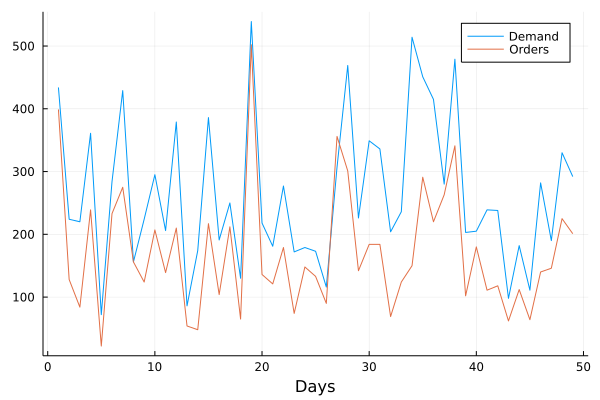

In [9]:
using Plots

plot(df.Demand, label="Demand", xlabel="Days")
plot!(df.Orders, label="Orders")

In [10]:
p =5 # unit price
c = 1 #unit cost

fπ(q,di) = p*min(q,di) - c*q   #Profit for single day
f°(q,d) = sum([fπ(qi,di) for (qi,di) in zip(q, d)])  # Total profit

res = f°(df.Orders, df.Demand)

println("Total Profit = ", res)

Total Profit = 33295


__(3*b*)__ Determine what day 50's size should be if 350 orders have been received at the beginning of day. Justify your answer.

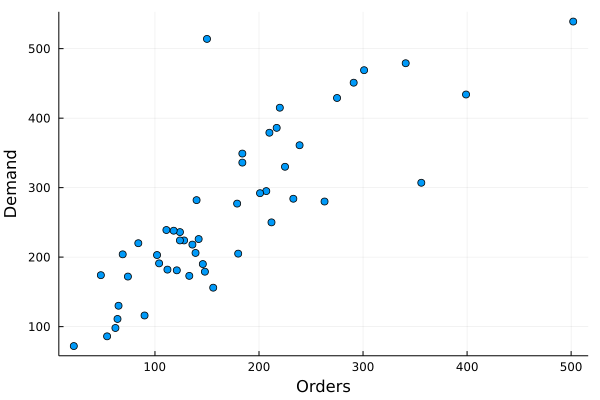

In [11]:
using Plots
d = df.Demand
o = df.Orders

scatter(o,d,legend=false, xlabel="Orders", ylabel="Demand", label="(x,y)")

In [13]:
using Statistics
cor(d,o)
println("The correlation bw the demand and the supply is: ", cor(d,o)) # better to linearly fir the model

The correlation bw the demand and the supply is: 0.8245080587752308


In [14]:
# Fitting model with simple linear model
fy°(α, o) = α[1] .+ α[2]o   # simple linear model
fl2(α) = sum((fy°(α, o)- d).^2)    #L2 loss function between true and predicted value
using Optim

α° = optimize(fl2, [0., 1.]).minimizer
@show α°

α° = [95.65901977582928, 0.9904243471212927]


2-element Vector{Float64}:
 95.65901977582928
  0.9904243471212927

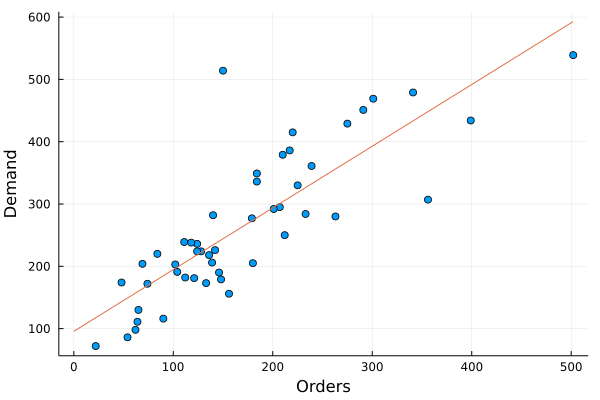

In [15]:
plot!(o -> fy°(α°,o), 0, maximum(o),  label="Linear")

In [16]:
res =  α°[1] + α°[2]*350
println("The demad for the 50th day will be based on the linearly fit model: ", res)

The demad for the 50th day will be based on the linearly fit model: 442.30754126828174


_Justification:_ 

Fit a model for orders and demand using Linear regression. The demad for 350 orders after minimizing the L2 loss is 442

__(3*c*)__ The \\$1 cost to bake each loaf of bread used in the analysis only includes the cost of ingredients and the direct labor cost of the baker. It has been estimated that it cost an additional \\$500 to fuel the oven each day for baking the bread, irrespective of the number of loaves baked in the oven. Since order data is available each morning, determine the impact on total profits if no bread were baked any day that the orders were below a threshold of 100, thereby saving \$500 for that day.

In [17]:
using DataFrames, CSV
df2 = DataFrame(CSV.File("NL_Opt-3-Data_3c.csv")) # removed all orders which are less than threshold of 100

,Demand,Orders
,Int64,Int64
1,434,399
2,224,128
3,361,239
4,284,233
5,429,275
6,156,156
7,224,124
8,295,207
9,206,139


In [18]:
p =5 # unit price
c = 1 #unit cost

fπ(q,di) = p*min(q,di) - c*q - 500  #Profit for single day as bakery has to incur additional cost of $500
f°(q,d) = sum([fπ(qi,di) for (qi,di) in zip(q, d)])  # Total profit

res = f°(df2.Orders, df2.Demand)

println("Total Profit = ", res)

Total Profit = 11267


__(3*d*)__ Describe (in words, no code) a possible procedure to determine the optimal threshold to use.

_Your Procedure:_ 

As every optim function optimizes the function and give the minimum value, so for optimum case we will try to optimize negative of profit function which will give the max profit and corresponding value of threshold will give the optimal value.